## USING DATASETS FROM VIDEO.IPYNB DATACLEANING


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder #change from labels to 0, 1
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, ENGLISH_STOP_WORDS
import tensorflow as tf



ImportError: cannot import name 'TfidfVectorizer' from 'sklearn.metrics' (/Users/roryoflynn/Desktop/2025 - SPRING/INFO-5603-TEXTMINING/TXTProject/TextMining311/lib/python3.11/site-packages/sklearn/metrics/__init__.py)

In [16]:
df1 = pd.read_csv('VIDEODATA.csv')
df2 = pd.read_csv('df500.csv')


#MODEL TRAINING BB

In [ ]:

X = df2.drop(columns=['LABEL'])
Y = df2['LABEL']

le = LabelEncoder()
Yencoded = le.fit_transform(Y)


X_train, X_test, Ytrain, Ytest = train_test_split(
    X, Yencoded,
    test_size=0.2,
    stratify=Yencoded,
    random_state=42
)


In [13]:
X_train.to_csv('X_trainNN.csv', index=False)
X_test.to_csv('X_testNN.csv', index=False)

In [15]:
X_train

,ability,able,absolutely,according,account,actual,add,adobe,advice,ago,...,wow,write,writing,wrong,yeah,years ago,yes,youll,young,youtube
754,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
883,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
554,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
900,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1030,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
377,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38,1,0,2,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [4]:
# refactoring from the RNN example code

#BUILD ITT
model = keras.models.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

/Users/roryoflynn/Desktop/2025 - SPRING/INFO-5603-TEXTMINING/TXTProject/TextMining311/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        64,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 72,449 (283.00 KB)

 Trainable params: 72,449 (283.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#oops my test stuff are dataframes causing issues so i used numpy to fix
X_train_arr = X_train.to_numpy()
X_test_arr  = X_test.to_numpy()

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


Training = model.fit(
    X_train_arr,
    Y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test_arr, Y_test),
    callbacks=[keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)]
)


Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5073 - loss: 0.7396 - val_accuracy: 0.7500 - val_loss: 0.6232
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7134 - loss: 0.5981 - val_accuracy: 0.8147 - val_loss: 0.5538
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8073 - loss: 0.5264 - val_accuracy: 0.8276 - val_loss: 0.5095
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8445 - loss: 0.4499 - val_accuracy: 0.8233 - val_loss: 0.4873
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8678 - loss: 0.3749 - val_accuracy: 0.8276 - val_loss: 0.4713
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8882 - loss: 0.3136 - val_accuracy: 0.8362 - val_loss: 0.4646
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8995 - loss: 0.2792 - val_accuracy: 0.8448 - val_loss: 0.4895
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9113 - loss: 0.2423 - val_accuracy: 0.8491 - val_loss

In [ ]:
# Test set
test_loss, test_acc = model.evaluate(X_test_arr, Y_test, verbose=0)
print(f"Test Loss is: {test_loss:.4f} — Test Accuracy: {test_acc:.4f}")


Test Loss is: 0.4646 — Test Accuracy: 0.8362


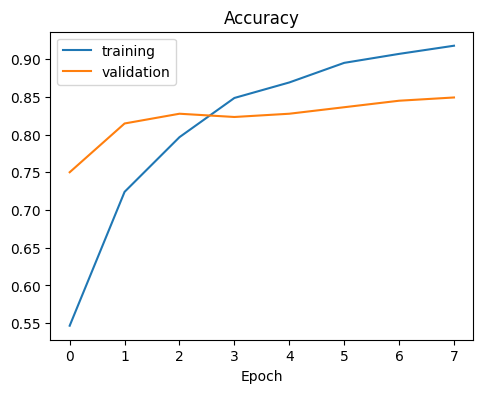

In [11]:
plt.figure(figsize=(12,4))
#david showed me his plots and I was like omg good idea yes yes so i made some comparison line plots
#how accurate?
plt.subplot(1,2,1)
plt.plot(Training.history['accuracy'], label='training')
plt.plot(Training.history['val_accuracy'], label='validation')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.legend()

#if training > validation then its a sign of overfitting

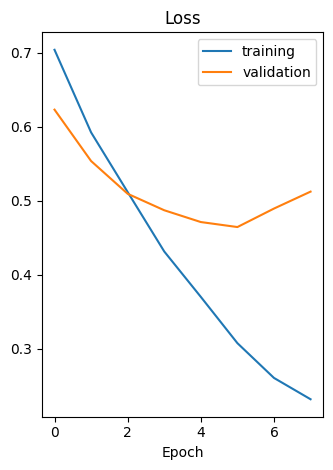

In [8]:
plt.subplot(1,2,2)
plt.plot(Training.history['loss'], label='training')
plt.plot(Training.history['val_loss'], label='validation')
plt.title('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

#validation rising means its overfitting

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


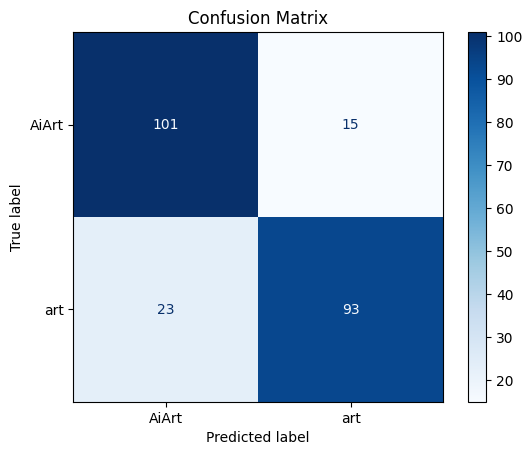

              precision    recall  f1-score   support

       AiArt       0.81      0.87      0.84       116
         art       0.86      0.80      0.83       116

    accuracy                           0.84       232
   macro avg       0.84      0.84      0.84       232
weighted avg       0.84      0.84      0.84       232



In [ ]:
Y_pred_prob = model.predict(X_test_arr)
Y_pred = (Y_pred_prob > 0.5).astype(int).flatten()

class_names = le.classes_   #my classes are the labels AIArt and art
cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()
print(classification_report(Y_test, Y_pred, target_names=class_names))


In [ ]:
##what about tfIdf?


X = df1.drop(columns=['LABEL'])
Y = df1['LABEL']

le = LabelEncoder()
Y_encoded = le.fit_transform(Y)


X_train1, X_test1, Y_train1, Y_test1 = train_test_split(
    X, Y_encoded,
    test_size=0.2,
    stratify=Y_encoded,
    random_state=42
)




In [ ]:
df1.sample(5)

tfIDF1 = df1.copy()
texts = tfIDF1['text'].fillna('').tolist()
labels = tfIDF1['LABEL'].tolist()

vectorizer500 = TfidfVectorizer(
    token_pattern=r'\b[a-zA-Z]{3,}\b',  # same: words ≥3 letters
    lowercase=True,
    ngram_range=(1,4),
    stop_words='english',
    max_features=500,
    max_df=0.1,
)

,LABEL,text
755,AiArt,why cant these idiots stop their witchhunting
1338,art,Explore Overnice's Squeezy variable font poste...
1311,art,army of darkness watercolors
179,art,Staatsgalerie Stuttgart is getting a chromatic...
522,art,need help making a decision regarding college ...


In [ ]:
# refactoring from the RNN example code

#BUILD ITT
model = keras.models.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

In [ ]:
balanced_df = (
    VIDEOdf
    .groupby('LABEL')
    .sample(n=min_n, random_state=42)
    .reset_index(drop=True)
)


texts = balanced_df['text'].fillna('').tolist()
labels = balanced_df['LABEL'].tolist()

vectorizer500 = TfidfVectorizer(
    token_pattern=r'\b[a-zA-Z]{3,}\b',  # same: words ≥3 letters
    lowercase=True,
    ngram_range=(1,4),
    stop_words='english',
    max_features=500,
    max_df=0.1,
)

dtm500 = vectorizer500.fit_transform(texts)
feature_names = vectorizer500.get_feature_names_out()

# Build the dataframe
tfdf500 = pd.DataFrame(dtm500.toarray(), columns=feature_names)
tfdf500.insert(0, 'LABEL', labels)
print(tfdf500['LABEL'].value_counts())
